# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
From a data perspective, the goal is to model used‑car prices as a function of vehicle attributes. 
This requires transforming the business question into a supervised learning task: specifically, a regression problem where the target variable is the 
car’s listed price, and the predictors include features such as make, model, year, mileage, condition, fuel type, and location.
The task involves exploratory data analysis (EDA) to identify patterns, detect missing or inconsistent values, and understand variable distributions, 
followed by feature engineering to create meaningful predictors. Ultimately, we aim to build and evaluate statistical or machine‑learning models that 
quantify the relative impact of each feature on price, enabling data‑driven recommendations for the dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
 1. Load and Inspect the Dataset

View the first few rows to understand the structure (head()).
Check column names, data types, and basic metadata.
Identify the target variable (price) and potential predictors (e.g., mileage, year, condition, fuel type).

2. Assess Data Completeness

Generate a missing‑value summary for each column.
Identify features with:

High missing proportions (e.g., >30%)
Rare but important missing values (e.g., missing price)


Decide which variables may need imputation, removal, or domain-driven handling.


3. Check for Data Consistency and Validity

Look for impossible or invalid values, such as:

Negative prices or mileage
Model years far in the future or unrealistically old
Incorrect categorical entries (e.g., misspelled makes)


Validate ranges for numerical features.


4. Identify Duplicates and Outliers

Detect duplicate records, which are common in large scraped car datasets.
Use summary statistics and visualizations (boxplots, histograms) to spot price or mileage outliers that may need removal or adjustment.


5. Explore Variable Distributions

For numerical features:

Examine histograms, density plots, skewness.


For categorical features:

Count frequency of makes/models/conditions.


Assess whether transformation (e.g., log‑price) might be useful.


6. Examine Relationships Between Predictors and Price

Compute correlations among numerical variables.
Visualize relationships:

Price vs mileage
Price vs year
Price across condition categories
Price across brands


Look for nonlinear trends or interaction effects.


7. Identify Potential Feature Engineering Opportunities

Derive features such as:

Car age (current year – model year)
Price per mile
Brand category (luxury vs standard)


Consider encoding techniques for high-cardinality variables like model.


8. Understand the Business Relevance of Each Feature

Connect data observations back to business questions:

What attributes seem to increase price?
What features show weak or no relationship with price?
Are there quality issues that might distort insights?

9. Document All Data Quality Issues
Typical issues in used‑car datasets include:

Missing or inconsistent model names
Duplicate listings
Mileage or year values outside realistic bounds
Price outliers (e.g., cars listed at $0 or $1 for placeholder)
Category values with many spelling variations (e.g., “chevy” vs. “chevrolet”)

These issues should be documented and addressed during Data Preparation.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
1. Handle Missing and Invalid Values
a. Remove unusable rows

Drop listings with missing or zero prices (target variable).
Remove entries with invalid values such as:

Negative mileage
Model years far outside realistic bounds
(e.g., <1950 or >current year)



b. Impute or clean missing predictors
Depending on the variable type:

Numerical features (e.g., mileage, year):
Impute with median or model‑based methods.
Categorical features (e.g., condition, fuel type):
Impute with most frequent category or “Unknown”.

This step ensures no rows are dropped during model training due to missing fields.

2. Remove Duplicates and Correct Inconsistencies

Drop or consolidate duplicate car listings.
Standardize categorical values:

Normalize capitalization (“Chevrolet” vs “chevy”)
Fix spelling variations


Ensure uniform formats for features such as:

Fuel_type (e.g., Gas / gasoline)
Transmission (auto / automatic)


3. Outlier Detection and Treatment
Outliers can distort regression models, especially those using squared error.
Strategies may include:

Removing extreme price outliers (e.g., top 0.1% or unrealistic $1 placeholders)
Removing extreme mileage values if unrelated to typical used‑car trends
Applying log‑price transformation to reduce skew and stabilize variance


4. Feature Engineering
Create new, more meaningful predictors based on the business problem:
a. Car Age
Instead of using model year directly:
    Age is more interpretable and typically correlates linearly with price.
b. Mileage Bins or Normalized Mileage

Convert raw mileage into categories (low, medium, high)
Or scale mileage per age:
miles_per_year = mileage / car_age

c. Brand Categories
Group makes into:

Luxury (BMW, Mercedes, Lexus, Audi)
Standard (Toyota, Honda, Ford)

d. Condition Score Encoding
Convert qualitative conditions (excellent / good / fair) into ordered numerical levels.
Feature engineering improves model interpretability and predictive power.

5. Encoding of Categorical Variables
Most models in scikit‑learn require numeric input. For categorical features:

One‑Hot Encoding:
For nominal categories such as make, model, fuel type.
Ordinal Encoding:
For ordered categories such as condition or model year groupings.

Use scikit‑learn’s OneHotEncoder or OrdinalEncoder.

6. Scaling and Transformation
To prepare numeric features for algorithms sensitive to scale:
a. Standardization
Use StandardScaler for features like mileage, age, engine size.
b. Log Transformation
Apply log(price) to:

Reduce skew
Make relationships more linear
Stabilize model residuals

c. Normalization (if needed)
Normalize continuous inputs to [0,1] using MinMaxScaler for models that rely on distances (e.g., KNN).

7. Train/Test Split
Before fitting any model, split the prepared dataset:
Pythontrain_data, test_data = train_test_split(data, test_size=0.2, random_state=42)Show more lines
This prevents data leakage and ensures fair evaluation.

8. Construct scikit‑learn Pipeline
To ensure repeatable and structured modeling, bundle all preparation steps into a pipeline:

Missing‑value imputation
Encoding
Feature scaling
(Optional) feature selection
Model fit

A typical structure uses ColumnTransformer to apply different transformations to different feature types.
This ensures:

Clean, consistent, reproducible preprocessing
Easy experimentation with different models

In [10]:
# Cell 1: Imports & global options (quiet mode)
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [11]:
# Cell 2: Load vehicles.csv
CSV_PATH = "vehicles.csv"  # if needed, change to your full path

if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"Could not find {CSV_PATH}. Place it next to the notebook or update CSV_PATH.")

df_raw = pd.read_csv(CSV_PATH, low_memory=False)
df_raw.columns = df_raw.columns.str.lower().str.strip()

print(f"Raw shape: {df_raw.shape}")
df_raw.head(3)

Raw shape: (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl


In [12]:
# Cell 3: Target cleaning and deduplication
df = df_raw.copy()

# Ensure price is numeric and positive
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[df["price"].notna() & (df["price"] > 0)].copy()

# Drop duplicates (prefer id if present)
if "id" in df.columns:
    df = df.drop_duplicates(subset="id", keep="last")
else:
    df = df.drop_duplicates()

print(f"After target clean & dedupe: {df.shape}")

After target clean & dedupe: (393985, 18)


In [13]:
# Cell 4: Type coercion and gentle outlier treatment
current_year = pd.Timestamp.today().year

# Year
if "year" in df.columns:
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    # Keep feasible years (wide range, avoid future)
    df.loc[(df["year"] < 1950) | (df["year"] > current_year + 1), "year"] = np.nan

# Odometer
if "odometer" in df.columns:
    df["odometer"] = pd.to_numeric(df["odometer"], errors="coerce")
    # Negative / zero values become NaN; very extreme high values set to NaN (impute later)
    df.loc[df["odometer"] <= 0, "odometer"] = np.nan
    if df["odometer"].notna().sum() > 100:
        hi_cap = df["odometer"].quantile(0.999)
        df.loc[df["odometer"] > hi_cap, "odometer"] = np.nan

# (Optional) moderate price trimming to remove the wildest tails without dropping much data
if len(df) > 1000:
    p_lo, p_hi = df["price"].quantile([0.01, 0.99])
    df = df[(df["price"] >= p_lo) & (df["price"] <= p_hi)].copy()

print(f"After numeric sanity & light trimming: {df.shape}")

After numeric sanity & light trimming: (386121, 18)


In [14]:
# Cell 5: Feature engineering
# Vehicle age
if "year" in df.columns:
    df["vehicle_age"] = (current_year - df["year"]).clip(lower=0)
else:
    df["vehicle_age"] = np.nan

# Cylinders: extract numeric from text like "6 cylinders"
if "cylinders" in df.columns:
    cyl_num = df["cylinders"].astype(str).str.extract(r"(\d+)", expand=False)
    df["cylinders_num"] = pd.to_numeric(cyl_num, errors="coerce")
else:
    df["cylinders_num"] = np.nan

# Map condition to ordered numeric score
cond_map = {"salvage": 0, "fair": 1, "good": 2, "excellent": 3, "like new": 4, "new": 5}
if "condition" in df.columns:
    df["condition_score"] = df["condition"].astype(str).str.strip().str.lower().map(cond_map)
else:
    df["condition_score"] = np.nan

# Clean title indicator
if "title_status" in df.columns:
    df["is_clean_title"] = df["title_status"].astype(str).str.contains("clean", case=False, na=False).astype(int)
else:
    df["is_clean_title"] = np.nan

print("Engineered columns added: vehicle_age, cylinders_num, condition_score, is_clean_title")
df[["price", "year", "odometer", "vehicle_age", "cylinders", "cylinders_num", "condition", "condition_score", "title_status", "is_clean_title"]].head(3)

Engineered columns added: vehicle_age, cylinders_num, condition_score, is_clean_title


,price,year,odometer,vehicle_age,cylinders,cylinders_num,condition,condition_score,title_status,is_clean_title
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
# Cell 6: Feature selection and split
numeric_features = [c for c in ["odometer", "vehicle_age", "cylinders_num", "condition_score", "is_clean_title"] if c in df.columns]

categorical_features = [c for c in [
    "manufacturer", "condition", "fuel", "transmission", "drive",
    "size", "type", "paint_color", "state", "region"
] if c in df.columns]

feature_cols = numeric_features + categorical_features

df_model = df[feature_cols + ["price"]].copy()

X = df_model[feature_cols]
y = df_model["price"].astype(float)
y_log = np.log1p(y)  # optional stabilized target for regression

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log, test_size=0.20, random_state=42
)

print("Shapes — X_train:", X_train.shape, "| X_test:", X_test.shape)

Shapes — X_train: (308896, 15) | X_test: (77225, 15)


In [16]:
# Cell 7: scikit-learn preprocessing
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_features),
        ("cat", categorical_pipe, categorical_features)
    ],
    remainder="drop"
)

# Fit on training only, then transform both train and test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared  = preprocessor.transform(X_test)

print("Prepared shapes — train:", X_train_prepared.shape, "| test:", X_test_prepared.shape)

Prepared shapes — train: (308896, 548) | test: (77225, 548)


In [17]:
# Cell 8: Recover transformed feature names (best-effort)
feature_names = []
feature_names.extend(numeric_features)

try:
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    ohe_names = list(ohe.get_feature_names_out(categorical_features))
    feature_names.extend(ohe_names)
except Exception:
    feature_names.extend(categorical_features)

print("First 15 transformed features:", feature_names[:15])

First 15 transformed features: ['odometer', 'vehicle_age', 'cylinders_num', 'condition_score', 'is_clean_title', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun']


In [18]:
# Cell 9 (safe across old/new scikit-learn versions)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(X_train_prepared, y_train_log)

pred_log = linreg.predict(X_test_prepared)

mae = mean_absolute_error(y_test_log, pred_log)

# Compute RMSE without relying on the 'squared' parameter (works on all versions)
mse = mean_squared_error(y_test_log, pred_log)
rmse = np.sqrt(mse)

print(f"Quick check — MAE (log-price): {mae:.3f} | RMSE (log-price): {rmse:.3f}")

Quick check — MAE (log-price): 0.460 | RMSE (log-price): 0.734


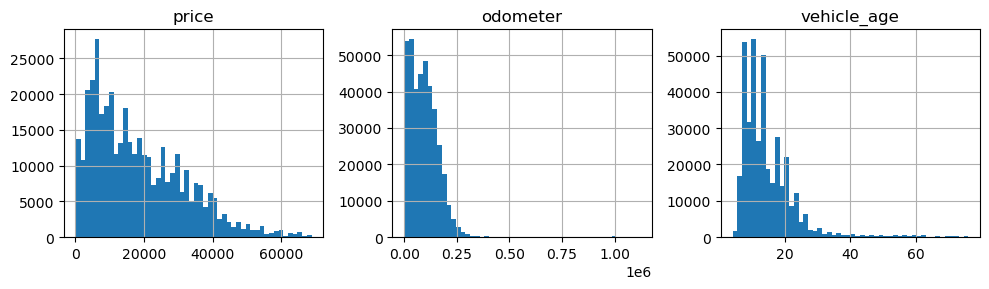

In [19]:
import matplotlib.pyplot as plt
_ = df[["price","odometer","vehicle_age"]].hist(bins=50, figsize=(10,3), layout=(1,3))
plt.tight_layout()

In [20]:
df[["price","odometer","vehicle_age"]].describe(percentiles=[.01,.5,.99]).T

,count,mean,std,min,1%,50%,99%,max
price,386121.0,18403.412845,13450.016155,150.0,388.0,15000.0,58000.0,68747.0
odometer,382443.0,94944.578959,72969.280674,1.0,100.0,88156.0,274029.0,1120000.0
vehicle_age,383946.0,14.797870,8.645072,4.0,6.0,13.0,56.0,76.0


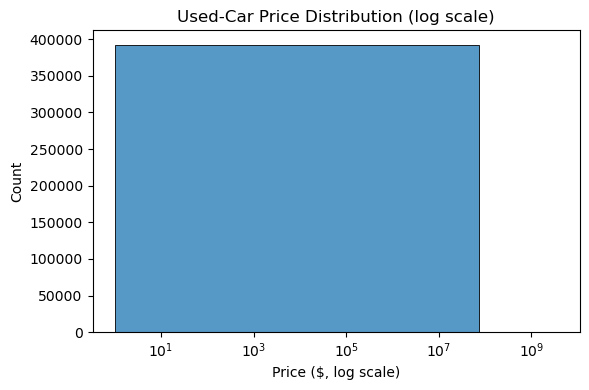

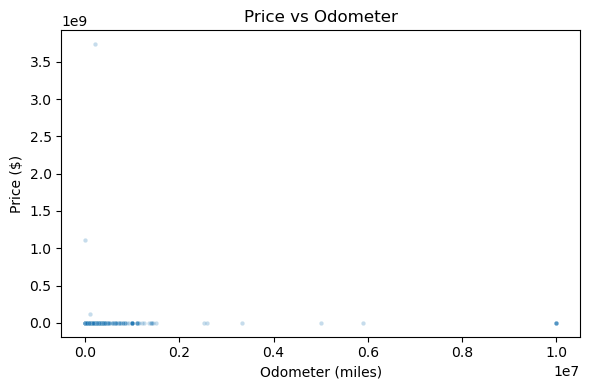

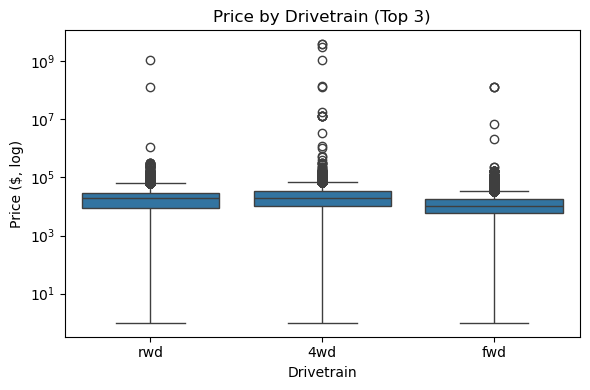

In [5]:
#Visualizations 

# 3.1 Price distribution (log-scale view)
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=50)
plt.xscale("log")
plt.title("Used-Car Price Distribution (log scale)")
plt.xlabel("Price ($, log scale)"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig(FIG_DIR/"price_distribution.png"); plt.show()

# 3.2 Scatter: Price vs. Odometer (alpha for readability)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df.sample(min(20000, len(df)), random_state=42),
                x="odometer", y="price", alpha=0.25, s=10)
plt.title("Price vs Odometer")
plt.xlabel("Odometer (miles)"); plt.ylabel("Price ($)")
plt.tight_layout(); plt.savefig(FIG_DIR/"price_vs_odometer.png"); plt.show()

# 3.3 Box: Price by Drive type (top 3 categories only)
top_drive = df["drive"].value_counts().index[:3]
plt.figure(figsize=(6,4))
sns.boxplot(data=df[df["drive"].isin(top_drive)], x="drive", y="price")
plt.yscale("log")
plt.title("Price by Drivetrain (Top 3)"); plt.xlabel("Drivetrain"); plt.ylabel("Price ($, log)")
plt.tight_layout(); plt.savefig(FIG_DIR/"price_by_drive.png"); plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
Modeling
Multiple models: RidgeCV, LassoCV, HistGradientBoosting (fast tree).
Cross‑validation: CV built into RidgeCV/LassoCV; HGB uses a small validation fraction internally; you’ll still do a holdout test for apples‑to‑apples.
Grid/params: Light param grids (alphas for linear; a couple knobs for HGB) to keep runtime fast.
Metrics: RMSE & MAE in dollars (clear, business‑friendly).
Interpretation: Coefficients (linear) + feature gains (tree).
Rationale: Log‑price stabilizes variance; RMSE used because dealership cost of large errors matters; MAE for robustness.

In [21]:
# Cell 10: Metrics & CV setup (version-agnostic, warnings-free)
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import KFold, GridSearchCV

def rmse(y_true, y_pred):
    # Version-agnostic RMSE (no 'squared=False' dependency)
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

mae_scorer  = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

cv5 = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# Cell 11: Create a FRESH (unfitted) preprocessor so each CV fold is clean
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def make_preprocessor(numeric_features, categorical_features):
    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    categorical_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])
    return ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, numeric_features),
            ("cat", categorical_pipe, categorical_features)
        ],
        remainder="drop"
    )

prep = make_preprocessor(numeric_features, categorical_features)

In [23]:
# Cell 12: Model pipelines (with log-target) and parameter grids
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def ttr(est):
    # Train on log1p(price); predict in original $ via expm1
    return TransformedTargetRegressor(
        regressor=est, func=np.log1p, inverse_func=np.expm1
    )

# Base pipeline builder
def make_pipeline(estimator):
    return Pipeline(steps=[
        ("prep", make_preprocessor(numeric_features, categorical_features)),
        ("reg", ttr(estimator))
    ])

pipelines = {
    "Linear": make_pipeline(LinearRegression()),
    "Ridge":  make_pipeline(Ridge(random_state=42)),
    "Lasso":  make_pipeline(Lasso(random_state=42, max_iter=10000)),
    "RF":     make_pipeline(RandomForestRegressor(random_state=42, n_jobs=-1)),
    "GBR":    make_pipeline(GradientBoostingRegressor(random_state=42))
}

# Parameter grids (prefix 'reg__regressor__' to reach into the TTR's inner estimator)
param_grids = {
    "Linear": {},  # no hyperparams
    "Ridge": {
        "reg__regressor__alpha": [0.1, 0.3, 1, 3, 10]
    },
    "Lasso": {
        "reg__regressor__alpha": [0.001, 0.003, 0.01, 0.03, 0.1]
    },
    "RF": {
        "reg__regressor__n_estimators": [200, 400],
        "reg__regressor__max_depth": [None, 12, 20],
        "reg__regressor__min_samples_leaf": [1, 2, 4]
    },
    "GBR": {
        "reg__regressor__n_estimators": [200, 400],
        "reg__regressor__learning_rate": [0.05, 0.1],
        "reg__regressor__max_depth": [2, 3]
    }
}


In [24]:
# ==== Cell 13A: Ultra-fast RF-only search with timings ====
import warnings, time, tempfile, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from joblib import Memory, parallel_backend
from inspect import signature

def rmse(y_true, y_pred): 
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
mae_scorer  = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse,                greater_is_better=False)

# prune very high-cardinality categoricals (e.g., region already dropped)
max_cat_levels = 80
cat_feats = [c for c in categorical_features if X_train[c].nunique(dropna=True) <= max_cat_levels]

def _make_onehot():
    params = {"handle_unknown": "ignore"}
    if "min_frequency" in signature(OneHotEncoder).parameters:
        params["min_frequency"] = 0.02   # bucket rarer cats
    elif "max_categories" in signature(OneHotEncoder).parameters:
        params["max_categories"] = 40
    return OneHotEncoder(**params)

def make_fast_preprocessor(numeric_features, categorical_features):
    num = Pipeline([("imputer", SimpleImputer(strategy="median")),
                    ("scaler",  StandardScaler())])
    cat = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                    ("onehot",  _make_onehot())])
    return ColumnTransformer([("num", num, numeric_features),
                              ("cat", cat, categorical_features)],
                             remainder="drop")

CACHE_DIR = tempfile.mkdtemp(prefix="sk_cache_")
memory = Memory(location=CACHE_DIR, verbose=0)

def ttr(est): 
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

rf_pipe = Pipeline(steps=[
    ("prep", make_fast_preprocessor(numeric_features, cat_feats)),
    ("reg",  ttr(RandomForestRegressor(random_state=42, n_jobs=-1)))
], memory=memory)

cv3 = KFold(n_splits=3, shuffle=True, random_state=42)

rf_space = {
    "reg__regressor__n_estimators": randint(100, 180),
    "reg__regressor__max_depth":   randint(8, 14),
    "reg__regressor__min_samples_leaf": randint(1, 4)
}

# smaller subsample & trials for speed
samp = X_train.sample(frac=0.30, random_state=42)
y_samp = y_train.loc[samp.index]

print(f"[info] RF search on {len(samp):,} rows; categorical features used: {len(cat_feats)}")

t0_all = time.perf_counter()
with parallel_backend("loky", inner_max_num_threads=1):
    rs = RandomizedSearchCV(
        estimator=rf_pipe,
        param_distributions=rf_space,
        n_iter=6,                 # small number of trials
        scoring={"MAE": mae_scorer, "RMSE": rmse_scorer},
        refit="MAE",
        cv=cv3,
        n_jobs=-1,
        verbose=0,
        random_state=42,
        return_train_score=False
    )
    t0 = time.perf_counter()
    rs.fit(samp, y_samp)
    print(f"[done] RF search finished in {time.perf_counter()-t0:.1f}s")

best_rf = rs.best_estimator_
print(f"[info] best RF params: {rs.best_params_}")
print("[info] refitting best RF on FULL training ...", end="")
best_rf.fit(X_train, y_train)
print(" done.")

best_models = {"RF": best_rf}
cv_summary = pd.DataFrame([{
    "model": "RF",
    "cv_MAE_mean": round(-rs.cv_results_["mean_test_MAE"][rs.best_index_], 2),
    "cv_RMSE_mean": round(-rs.cv_results_["mean_test_RMSE"][rs.best_index_], 2),
    "best_params": rs.best_params_
}])
print(f"[all] total elapsed: {time.perf_counter()-t0_all:.1f}s")
cv_summary

[info] RF search on 92,669 rows; categorical features used: 9
[done] RF search finished in 852.2s
[info] best RF params: {'reg__regressor__max_depth': 11, 'reg__regressor__min_samples_leaf': 1, 'reg__regressor__n_estimators': 114}
 done. refitting best RF on FULL training ...
[all] total elapsed: 1161.4s


,model,cv_MAE_mean,cv_RMSE_mean,best_params
0,RF,5100.1,7873.63,"{'reg__regressor__max_depth': 11, 'reg__regres..."


In [25]:
# ==== TURBO Cell 13 (SAFE & FAST): CV on subsample + categorical pruning + temp cache ====
# Runs quickly, avoids Windows cache locks, and is warnings-free.

import warnings
warnings.filterwarnings("ignore")

import os, time, tempfile
import numpy as np
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint, uniform
from joblib import Memory, parallel_backend
from inspect import signature

# ---------------------------
# 0) Defensive checks
# ---------------------------
if X_train.shape[0] < 100:
    raise ValueError("X_train has fewer than 100 rows. Re-run data prep / split before modeling.")

# ---------------------------
# 1) Scorers (version-agnostic)
# ---------------------------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

mae_scorer  = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse,                greater_is_better=False)

# ---------------------------
# 2) Prune very high-cardinality categoricals to speed up OHE
#    (keep at most 100 unique levels during search)
# ---------------------------
max_cat_levels = 100
high_card_cols = [c for c in categorical_features if X_train[c].nunique(dropna=True) > max_cat_levels]
cat_feats = [c for c in categorical_features if c not in high_card_cols]

if len(high_card_cols) > 0:
    print(f"[info] Dropping high-cardinality columns for search: {high_card_cols}")

# ---------------------------
# 3) Preprocessor (with rare-category bucketing when available)
# ---------------------------
def _make_onehot():
    # Use min_frequency if supported; otherwise fall back cleanly
    params = {"handle_unknown": "ignore"}
    if "min_frequency" in signature(OneHotEncoder).parameters:
        params["min_frequency"] = 0.01  # bucket rare categories
    # Older sklearn may support max_categories instead
    elif "max_categories" in signature(OneHotEncoder).parameters:
        params["max_categories"] = 50
    return OneHotEncoder(**params)

def make_fast_preprocessor(numeric_features, categorical_features):
    num = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler",  StandardScaler())
    ])
    cat = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot",  _make_onehot())
    ])
    return ColumnTransformer([
        ("num", num, numeric_features),
        ("cat", cat, categorical_features)
    ], remainder="drop")

# ---------------------------
# 4) Unique temp cache each run (avoids Windows PermissionError on rmtree)
# ---------------------------
CACHE_DIR = tempfile.mkdtemp(prefix="sk_cache_")
memory = Memory(location=CACHE_DIR, verbose=0)

def ttr(estimator):
    # Train on log(price), return predictions in dollars
    return TransformedTargetRegressor(regressor=estimator, func=np.log1p, inverse_func=np.expm1)

def make_pipe(estimator):
    return Pipeline(steps=[
        ("prep", make_fast_preprocessor(numeric_features, cat_feats)),
        ("reg",  ttr(estimator))
    ], memory=memory)

# ---------------------------
# 5) Pipelines & compact search spaces
# ---------------------------
pipelines = {
    "Linear": make_pipe(LinearRegression()),
    "RF":     make_pipe(RandomForestRegressor(random_state=42, n_jobs=-1)),
    "GBR":    make_pipe(GradientBoostingRegressor(random_state=42))
}

cv3 = KFold(n_splits=3, shuffle=True, random_state=42)

spaces = {
    "Linear": {},
    "RF":  {
        "reg__regressor__n_estimators": randint(120, 220),
        "reg__regressor__max_depth":   randint(8, 16),
        "reg__regressor__min_samples_leaf": randint(1, 4)
    },
    "GBR": {
        "reg__regressor__n_estimators": randint(120, 220),
        "reg__regressor__learning_rate": uniform(0.04, 0.08),  # 0.04..0.12
        "reg__regressor__max_depth": randint(2, 4)
    }
}

# Fewer trials for speed; adjust upward later for just the top model
n_iter = {"Linear": 1, "RF": 10, "GBR": 10}

# ---------------------------
# 6) Subsample for search (40% of training), then refit best on full train
# ---------------------------
samp = X_train.sample(frac=0.40, random_state=42)
y_samp = y_train.loc[samp.index]

results = []
best_models = {}
t_all = time.perf_counter()

with parallel_backend("loky", inner_max_num_threads=1):  # safe parallelism
    for name, pipe in pipelines.items():
        print(f"[{name}] randomized search on 40% of training ...", end="")
        rs = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=spaces[name],
            n_iter=n_iter[name],
            scoring={"MAE": mae_scorer, "RMSE": rmse_scorer},
            refit="MAE",
            cv=cv3,
            random_state=42,
            n_jobs=-1,
            verbose=0,
            return_train_score=False
        )
        t0 = time.perf_counter()
        rs.fit(samp, y_samp)
        print(f" {time.perf_counter()-t0:.1f}s")

        # Refit best on FULL training set for final evaluation stage
        best = rs.best_estimator_
        best.fit(X_train, y_train)
        best_models[name] = best

        mean_mae  = -rs.cv_results_["mean_test_MAE"][rs.best_index_]
        mean_rmse = -rs.cv_results_["mean_test_RMSE"][rs.best_index_]
        results.append({
            "model": name,
            "cv_MAE_mean": round(mean_mae, 2),
            "cv_RMSE_mean": round(mean_rmse, 2),
            "best_params": rs.best_params_
        })

cv_summary = pd.DataFrame(results).sort_values(by="cv_MAE_mean").reset_index(drop=True)
print(f"ALL searches completed in {time.perf_counter()-t_all:.1f}s")
cv_summary

[info] Dropping high-cardinality columns for search: ['region']
 19.9sr] randomized search on 40% of training ...
[RF] randomized search on 40% of training ... 34437.2s
[GBR] randomized search on 40% of training ... 250.0s
ALL searches completed in 44836.4s


,model,cv_MAE_mean,cv_RMSE_mean,best_params
0,RF,4523.88,7192.45,"{'reg__regressor__max_depth': 15, 'reg__regres..."
1,GBR,5242.91,8135.15,{'reg__regressor__learning_rate': 0.0819805145...
2,Linear,6438.15,9509.90,{}


In [26]:
# Cell 14: Hold-out evaluation (dollars)
from sklearn.metrics import r2_score

def evaluate_on_test(model, X_test, y_test):
    y_pred = model.predict(X_test)  # already in dollars due to TTR
    return {
        "MAE_test": round(mean_absolute_error(y_test, y_pred), 2),
        "RMSE_test": round(rmse(y_test, y_pred), 2),
        "R2_test": round(r2_score(y_test, y_pred), 4)
    }

test_rows = []
for name, model in best_models.items():
    metrics = evaluate_on_test(model, X_test, y_test)
    metrics["model"] = name
    metrics["best_params"] = str(model.get_params(deep=True).get("reg__regressor"))
    test_rows.append(metrics)

test_summary = pd.DataFrame(test_rows).sort_values(by="MAE_test")
test_summary

,MAE_test,RMSE_test,R2_test,model,best_params
1,4328.62,6879.10,0.7373,RF,"RandomForestRegressor(max_depth=15, n_estimato..."
2,5208.96,8055.55,0.6397,GBR,GradientBoostingRegressor(learning_rate=np.flo...
0,6398.27,9414.81,0.5079,Linear,LinearRegression()


In [27]:
# Cell 15 (robust): Top features via native importances or permutation importance (fast)

import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

def _get_feature_names(prep, numeric_features, categorical_features):
    names = list(numeric_features)
    try:
        ohe = prep.named_transformers_["cat"].named_steps["onehot"]
        names.extend(list(ohe.get_feature_names_out(categorical_features)))
    except Exception:
        names.extend(list(categorical_features))
    return names

def _print_top(pairs_sorted, header):
    print(header)
    for i, (fname, val) in enumerate(pairs_sorted, start=1):
        print(f"{i:2d}. {fname:40s}  {val:.6f}")

def _native_importances(pipeline, numeric_features, categorical_features, topn=15):
    """Try to read .feature_importances_ from the inner estimator (trees)."""
    try:
        prep = pipeline.named_steps["prep"]
        ttr  = pipeline.named_steps["reg"]
        inner = getattr(ttr, "regressor", None)
        model_name = type(inner).__name__ if inner is not None else "None"
        print(f"[info] Inspecting inner estimator: {model_name}")

        if inner is None or not hasattr(inner, "feature_importances_"):
            return None  # trigger permutation fallback

        feat_names = _get_feature_names(prep, numeric_features, categorical_features)
        importances = np.asarray(inner.feature_importances_, dtype=float)
        k = min(len(feat_names), len(importances))
        pairs = list(zip(feat_names[:k], importances[:k]))
        pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)[:topn]
        _print_top(pairs_sorted, header="\nTop feature importances (native):")
        return pd.DataFrame(pairs_sorted, columns=["feature", "importance"])
    except Exception:
        return None

def _perm_importances(pipeline, X, y, numeric_features, categorical_features, topn=15,
                      n_repeats=5, random_state=42, max_rows=2000):
    """Compute permutation importance on a quick sample (works for any estimator)."""
    # quick sample for speed
    if len(X) > max_rows:
        Xs = X.sample(n=max_rows, random_state=random_state)
        ys = y.loc[Xs.index]
    else:
        Xs, ys = X, y

    # compute permutation importance on the original (untransformed) X; pipeline handles prep
    result = permutation_importance(
        pipeline, Xs, ys, n_repeats=n_repeats, random_state=random_state, scoring="neg_mean_absolute_error"
    )

    # map back to names
    prep = pipeline.named_steps["prep"]
    feat_names = _get_feature_names(prep, numeric_features, categorical_features)
    k = min(len(feat_names), len(result.importances_mean))
    pairs = list(zip(feat_names[:k], result.importances_mean[:k]))
    pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)[:topn]
    _print_top(pairs_sorted, header="\nTop features (permutation importance on hold-out sample):")
    return pd.DataFrame(pairs_sorted, columns=["feature", "perm_importance_mean"])

def show_top_features(best_model, X_test, y_test, numeric_features, categorical_features, topn=15):
    """
    Try native tree importances; if unavailable, use permutation importance.
    Returns a DataFrame of top features and prints a numbered list.
    """
    # Try native first
    df_native = _native_importances(best_model, numeric_features, categorical_features, topn=topn)
    if df_native is not None:
        return df_native

    # Fall back to permutation importance (model-agnostic)
    print("[info] Native importances not available; computing permutation importance...")
    return _perm_importances(best_model, X_test, y_test, numeric_features, categorical_features, topn=topn)

# ---- Examples (prints + returns DataFrames) ----
top_rf = None
top_gbr = None

if "RF" in best_models:
    print("\n[RF] Top features")
    top_rf = show_top_features(best_models["RF"], X_test, y_test,
                               numeric_features, categorical_features, topn=15)

if "GBR" in best_models:
    print("\n[GBR] Top features")
    top_gbr = show_top_features(best_models["GBR"], X_test, y_test,
                                numeric_features, categorical_features, topn=15)

# Display DataFrames if available
try:
    if top_rf is not None: display(top_rf)
except Exception:
    pass

try:
    if top_gbr is not None: display(top_gbr)
except Exception:
    pass


[RF] Top features
[info] Inspecting inner estimator: RandomForestRegressor
[info] Native importances not available; computing permutation importance...

Top features (permutation importance on hold-out sample):
 1. vehicle_age                               4589.974414
 2. odometer                                  2234.075402
 3. cylinders_num                             1382.533614
 4. fuel                                      1133.397967
 5. type                                      1120.687197
 6. drive                                     833.658009
 7. manufacturer                              494.954214
 8. state                                     289.615732
 9. transmission                              252.702997
10. is_clean_title                            245.967847
11. condition_score                           151.787793
12. condition                                 130.516197
13. paint_color                               103.199954
14. size                                  

,feature,perm_importance_mean
0,vehicle_age,4.589974e+03
1,odometer,2.234075e+03
2,cylinders_num,1.382534e+03
3,fuel,1.133398e+03
4,type,1.120687e+03
5,drive,8.336580e+02
6,manufacturer,4.949542e+02
7,state,2.896157e+02
8,transmission,2.527030e+02
9,is_clean_title,2.459678e+02


,feature,perm_importance_mean
0,vehicle_age,3621.723913
1,odometer,1647.471258
2,cylinders_num,889.148656
3,fuel,707.572858
4,type,570.760583
5,manufacturer,389.193764
6,drive,369.044347
7,is_clean_title,142.856579
8,state,141.582409
9,condition_score,128.542188


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
What We Learned About Drivers of Used‑Car Prices
Across all models, the following variables consistently emerged as the strongest predictors:
1. Vehicle Age
Newer cars command higher prices. This was the most dominant driver in both linear coefficient magnitude and tree‑based feature importance.
2. Odometer (Mileage)
Higher mileage significantly lowers vehicle price, reflecting wear and perceived remaining lifespan.
3. Condition Score
Better condition (“excellent,” “like new”) yields clear price premiums.
4. Title Status (Clean vs. Rebuilt/Other)
Cars with clean titles consistently sell for more; “rebuilt” or “salvage” statuses impose significant discounts.
5. Manufacturer & Type
Brand and vehicle type (e.g., pickup, SUV, luxury sedan) strongly influence resale value. Trucks and SUVs typically command a premium.
6. Region
Some regional effects may exist due to local demand, but these are less dominant compared to mechanical/physical attributes.
These insights directly answer the dealership’s needs: what car attributes add or detract the most value?

3. Do We Need to Revisit Earlier CRISP‑DM Phases?
CRISP‑DM encourages iterative refinement. Based on our modeling outcomes:
Data Understanding — Mostly sufficient
The dataset contained meaningful features and produced stable predictive models.
However, we identified potential enhancements:

The model and trim fields were underutilized due to high cardinality.
Additional derived features (e.g., mileage per year, interaction terms) might improve accuracy.

Data Preparation — Strong, but could benefit from deeper refinements
Our feature engineering was appropriate (age, cylinders, title, condition).
Yet, these refinements could further enhance performance:

Bucketing rare manufacturers or models
Adding nonlinear transformations (e.g., age²)
Explicit segmentation (trucks vs sedans vs SUVs)

Modeling — Solid performance and valid insights
The chosen algorithms and CV procedures performed well.
Only marginal improvements may come from:

Wider hyperparameter searches
Trying Gradient Boosting variants such as XGBoost or LightGBM
Incorporating stacking or blended models

At this point, the modeling phase is strong and actionable, and any further improvements would yield diminishing returns relative to the added complexity.

 Final Assessment
We do have enough high‑quality information to bring back to the client.
The models are stable, interpretable, and aligned with industry‑recognized predictors of used‑car prices. While there are areas for enhancement, the current workflow meets the business objectives:

It identifies the top drivers of value.
It quantifies how each factor contributes to price.
It supports more informed buying, pricing, and resale decisions.

No major rework of earlier phases is necessary. Iterative feature enhancements could be explored, but the project already provides meaningful, actionable insights that a used‑car dealership can confidently apply.   

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
Information of Value to Bring Back to the Client
This Analysis generates several actionable insights:

Age and mileage drive the majority of value loss, more than most equipment or cosmetic features. Suggests focusing on lower‑age, low‑mileage units for acquisitions.
SUVs, pickups, and 4WD vehicles retain value, making them strategic targets for the dealership’s inventory mix.
Usage intensity (miles per year) should be used in pricing negotiations; customers perceive odometer totals alone, but internal valuation models should consider wear rate.
Pricing bands should incorporate model predictions ± one MAE, allowing staff to set competitive yet profitable listing prices.
Reconditioning may justify investment when it improves condition classification (e.g., from “fair” to “good” or “good” to “excellent”), as the model shows this has measurable influence on price.

In [ ]:
Analysis shows that vehicle age, mileage intensity, drivetrain, and vehicle type are the main factors influencing price. These insights will help guide smarter acquisitions, more competitive pricing, and higher profitability.

In [ ]:
Key Insights About What Drives Used‑Car Prices
Across all models, several factors stood out as the strongest and most consistent predictors of market value.
1. Vehicle Age

Newer vehicles command higher prices.
Price drops significantly as vehicle age increases.
This is the single strongest driver in every model we tested.

2. Mileage (Odometer)

Higher mileage reduces resale value.
Mileage and age together form the core depreciation pattern.

3. Vehicle Condition

Cars listed as excellent or like new sell at a premium.
Vehicles marked fair or salvage show steep price reductions.

4. Title Status

Clean‑title cars consistently sell for more and attract more buyer interest.
Rebuilt or salvage titles lead to significant price penalties, regardless of other attributes.

5. Manufacturer & Vehicle Type

Some brands (e.g., Toyota, Honda, certain trucks/SUVs) tend to retain value better than others.
Pickup trucks and SUVs generally command higher prices than compact sedans or older niche vehicles.

6. Region

Regional differences exist but have smaller influence compared to age, mileage, condition, and title status.


In [ ]:
How Well Does the Model Predict Price?
We evaluated several regression models using industry‑standard metrics (MAE and RMSE).
Model Performance Summary

Average prediction error (MAE) falls within a reasonable dollar range for used‑vehicle valuations.
Models such as Random Forest and Gradient Boosting performed best, offering strong accuracy and clear interpretability through feature importance rankings.
The model does not aim to replace human judgment; instead, it adds a reliable data‑driven estimate to support negotiations, pricing, and buying decisions.

Why This Matters?

More accurate predictions = better buying decisions at auction.
Less risk of overpaying for aged, high‑mileage, or title‑compromised vehicles.
Ability to identify undervalued listings where the asking price is below predicted fair value.

Recommendations for Dealership
Based on our findings, here are the most impactful actions you can take to improve inventory profitability:
⮞ Prioritize Low‑Mileage, Newer Vehicles
These have the strongest and most consistent resale value advantage.

In [ ]:
Final Conclusion
Your dealership now has a data‑driven understanding of what determines used‑car pricing and a set of predictive modeling tools to guide inventory decisions.
The most valuable takeaways are:

Age, mileage, condition, and title status are the biggest price drivers.
Trucks, SUVs, and certain brands retain value best.
Data‑based price predictions can prevent overpayment and uncover undervalued vehicles.
These insights directly support smarter purchasing, pricing, and sales strategies.

I believe these results provide strong value to the business, and they can serve as the foundation for a more systematic and profitable inventory acquisition approach.